In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import calendar

In [26]:
import os
for dirname, _, filename in os.walk('/kaggle/input'):
    for filename in filename:
        print(os.path.join(dirname, filename))








/kaggle/input/unemployment-analysis/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-analysis/Unemployment in India.csv


In [27]:
import plotly.express as px


In [28]:
unemp_rate = pd.read_csv("/kaggle/input/unemployment-analysis/Unemployment_Rate_upto_11_2020.csv")

In [29]:
unemp_rate

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [30]:
unemp_rate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [31]:
unemp_rate.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [32]:
unemp_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [33]:
unemp_rate.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [34]:
unemp_rate.columns = ["states","date","frequency","EUR","EE","ELPR","Region","longitude","lattitude"]

In [35]:
unemp_rate.head()

,states,date,frequency,EUR,EE,ELPR,Region,longitude,lattitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [36]:
unemp_rate["states"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [37]:
unemp_rate["Region"].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [38]:
unemp_rate.groupby("Region").size()

Region
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

In [39]:
## adding a new column as months

In [40]:
unemp_rate['date'] = pd.to_datetime(unemp_rate['date'], dayfirst=True)
unemp_rate['frequency'] = unemp_rate['frequency'].astype('category')
unemp_rate['month'] = unemp_rate['date'].dt.month
unemp_rate['month_int'] = unemp_rate['month'].apply(lambda x : int(x))
unemp_rate['month_name'] = unemp_rate['month_int'].apply(lambda x : calendar.month_abbr[x])
unemp_rate['Region'] = unemp_rate['Region'].astype('category')
unemp_rate.drop(columns='month', inplace=True)
unemp_rate

,states,date,frequency,EUR,EE,ELPR,Region,longitude,lattitude,month_int,month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,5,May
...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep


In [41]:
region_stats = unemp_rate.groupby(['Region'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,EUR,EE,ELPR
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


## now plotting with heat maps

<Axes: >

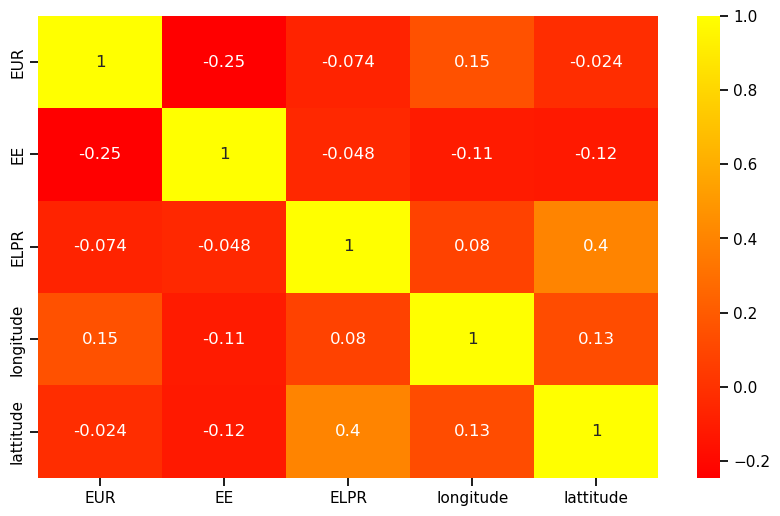

In [42]:
heat_map = unemp_rate[['EUR','EE','ELPR','longitude','lattitude']]

heat_map = heat_map.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_map, annot=True,cmap='autumn')

### basic stats

In [43]:
unemp_rate.stats = unemp_rate[['EUR','EE','ELPR']]

round(unemp_rate.describe().T,2)

/tmp/ipykernel_32/3097780622.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,count,mean,std,min,25%,50%,75%,max
EUR,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
EE,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
ELPR,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69
longitude,267.0,22.83,6.27,10.85,18.11,23.61,27.28,33.78
lattitude,267.0,80.53,5.83,71.19,76.09,79.02,85.28,92.94
month_int,267.0,5.54,2.87,1.00,3.00,6.00,8.00,10.00


### the data exploratory analysis 


In [44]:
figure = px.box(unemp_rate, x='states', y='EUR', color='states', title = 'the unemployment rate in india',template='plotly')
figure.update_layout(xaxis={'categoryorder':'total descending'})


In [45]:
## according to different regions of india by histogram

In [49]:
unemp_rate.head()

,states,date,frequency,EUR,EE,ELPR,Region,longitude,lattitude,month_int,month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


<Axes: title={'center': 'the unemployment rate'}, xlabel='EUR', ylabel='Count'>

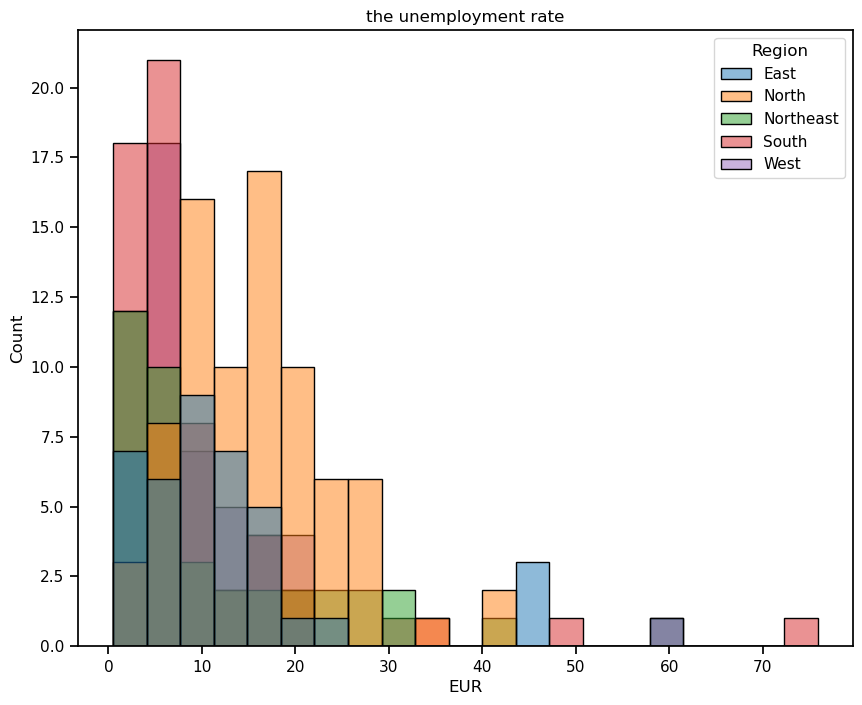

In [51]:
unemp_rate.columns = ["states","date","frequency","EUR","EE","ELPR","Region","longitude","lattitude","month_int","month_name"]

plt.figure(figsize=(10,8))
plt.title("the unemployment rate")
sns.histplot(x='EUR', hue="Region", data=unemp_rate)


In [52]:
### the average unemployment rate analysis

In [53]:
region = unemp_rate.groupby(["Region"])[['EUR','EE','ELPR']].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="the average unemployment rate across regions")
fig.update_layout(xaxis={'categoryorder':'total descending'})


In [54]:
### pie chart

In [55]:
unemployment_rate= unemp_rate[["states", "Region", "EUR"]]

fig = px.sunburst(unemployment_rate, path=['Region','states'], values='EUR',
                  title= 'Unemployment rate in every State and in every Region', height=550
                 )
fig.show()

## due to the impact of lockdown in india as the cause of COVID-19
#### the estimated employed

In [56]:
figure = px.scatter_matrix(unemp_rate, template='plotly',dimensions=['EUR','EE','ELPR'],color='Region')

In [57]:
figure.show()

In [58]:
### impact of unemployment rate due to lockdown across different regions and states from jan 2020 to oct 2020

In [60]:
fig = px.bar(unemp_rate, x='Region', y='EUR', animation_frame='month_name', color='states',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=700, template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000


In [61]:
fig